In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Visualization settings
sns.set(font_scale=1.2)
# Load the dataset
recipes = pd.read_csv('cupcakes.csv')
recipes.head()


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [4]:
recipes.shape


(20, 9)

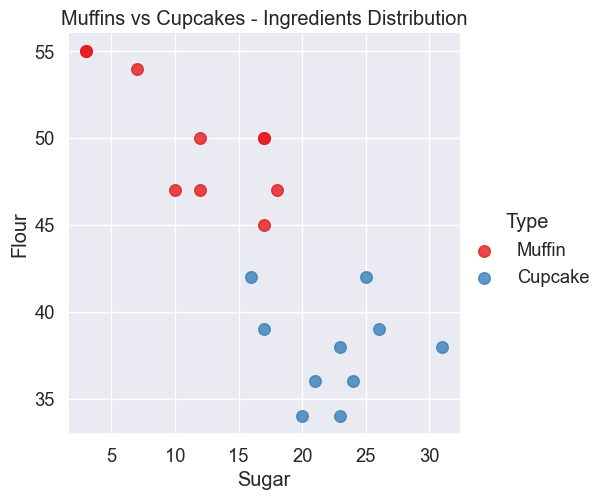

In [5]:
# Plot the data
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type',
 palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.title("Muffins vs Cupcakes - Ingredients Distribution")
plt.show()


In [6]:
# Prepare the data
X = recipes[['Sugar', 'Flour']]
y = recipes['Type']

In [7]:
# Train the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Get model coefficients w0 * x + w1 * y + b = 0
w0 = model.coef_[0][0]
w1 = model.coef_[0][1]
b = model.intercept_[0]


In [9]:
# Calculate slope and intercept for the main decision boundary y=−(w0/w1)x − b/w1
a = -w0 / w1
xx = np.linspace(5, 30) # Range for x-axis
yy = a * xx - (b / w1) # Decision boundary line


In [10]:
# Calculate upper and lower margin lines using support vectors
b_down = model.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])
b_up = model.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])


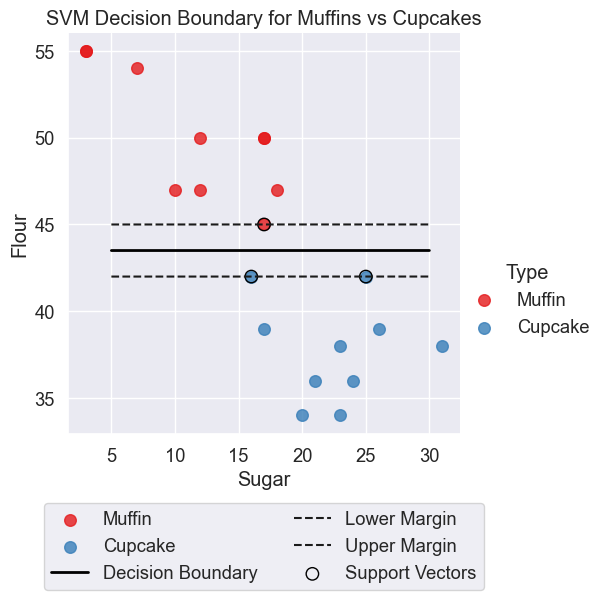

In [11]:
# Plot the data and the SVM boundaries
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# Plot the decision boundary and margins
plt.plot(xx, yy, linewidth=2, color='black', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Lower Margin')
plt.plot(xx, yy_up, 'k--', label='Upper Margin')

# Highlight the support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='black', label='Support Vectors')

# Final plot formatting
plt.title("SVM Decision Boundary for Muffins vs Cupcakes")
plt.xlabel("Sugar")
plt.ylabel("Flour")

# Legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


In [12]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model again on training data
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
# Make predictions
pred = model1.predict(x_test)


In [14]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred, target_names=['Muffin', 'Cupcake']))


Confusion Matrix:
[[1 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

      Muffin       1.00      0.50      0.67         2
     Cupcake       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Simple Method

Confusion Matrix:
 [[1 1]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

     Cupcake       1.00      0.50      0.67         2
      Muffin       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



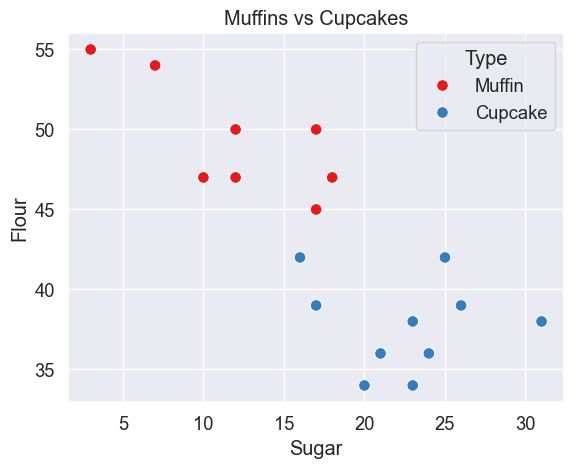

In [16]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
# Load the dataset
recipes = pd.read_csv('cupcakes.csv')
# Features and target
X = recipes[['Sugar', 'Flour']]
y = recipes['Type']
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Plot data with predictions
sns.scatterplot(data=recipes, x='Sugar', y='Flour', hue='Type', palette='Set1', s=70)
plt.title("Muffins vs Cupcakes")
plt.xlabel("Sugar")
plt.ylabel("Flour")
plt.show()